In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

Exploratory Data Analysis

In [3]:
train_data = pd.read_table('a3-train.data', header=None, sep='\s+')

In [4]:
train_data.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
1086,478,416,441,484,445,478,476,479,500,469,...,473,472,495,303,432,556,481,463,573,498
1009,487,554,529,475,486,477,433,477,470,485,...,525,486,507,497,488,503,477,510,497,511
106,488,461,487,475,517,486,488,475,484,482,...,471,481,513,248,577,544,481,461,511,499
777,482,524,480,479,546,477,505,476,498,492,...,510,483,462,508,516,532,485,471,440,488
271,486,482,546,490,473,485,425,477,481,472,...,469,480,492,583,497,495,479,484,487,514


In [5]:
test_data = pd.read_table('a3-test.data', header=None, sep='\s+')

In [6]:
test_data.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
118,477,487,512,473,542,481,505,477,466,480,...,495,482,471,433,513,530,470,503,489,454
138,493,487,489,475,483,472,490,476,511,478,...,515,477,492,634,535,521,473,463,504,451
105,477,491,459,482,536,485,503,477,508,482,...,477,483,442,598,523,543,482,475,503,483
477,483,466,519,478,581,473,504,475,520,490,...,470,479,474,597,479,508,478,470,569,503
353,481,509,464,473,567,472,421,477,516,489,...,487,481,479,471,440,465,488,486,516,439


In [7]:
train_labels = pd.read_csv('a3-train.labels.txt', sep=" ", header=None)

In [8]:
test_labels = pd.read_csv('a3-test.labels.txt', sep=" ", header=None)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 500 entries, 0 to 499
dtypes: int64(500)
memory usage: 7.6 MB


In [10]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,481.722500,483.452500,510.166000,483.384500,501.612500,479.259000,480.109500,476.565000,486.793500,478.78900,...,482.458500,478.811500,486.356500,496.565500,493.49950,510.893000,478.219500,483.309000,507.977000,490.266000
std,6.421769,30.186294,38.899165,9.059895,41.389418,6.795956,40.575925,1.384461,15.043836,7.19092,...,20.890033,4.011735,23.967366,127.635442,34.81902,37.459353,5.880613,13.559847,37.224297,25.825273
min,462.000000,381.000000,370.000000,453.000000,371.000000,459.000000,334.000000,471.000000,430.000000,455.00000,...,407.000000,463.000000,391.000000,130.000000,368.00000,398.000000,457.000000,435.000000,363.000000,403.000000
25%,477.000000,464.000000,485.000000,477.000000,475.000000,475.000000,452.750000,476.000000,477.000000,474.00000,...,468.000000,476.000000,471.000000,404.000000,470.00000,486.000000,474.000000,474.000000,482.000000,473.000000
50%,482.000000,483.000000,510.500000,483.000000,500.000000,479.000000,480.000000,477.000000,487.000000,479.00000,...,482.000000,479.000000,486.000000,504.000000,492.00000,511.000000,478.000000,483.000000,508.000000,490.000000
75%,486.000000,503.000000,536.000000,490.000000,528.000000,484.000000,506.250000,477.000000,496.250000,484.00000,...,496.000000,481.000000,502.000000,586.000000,517.00000,535.000000,482.000000,492.000000,533.000000,507.250000
max,503.000000,600.000000,654.000000,519.000000,688.000000,505.000000,611.000000,481.000000,536.000000,503.00000,...,549.000000,497.000000,566.000000,920.000000,615.00000,661.000000,500.000000,535.000000,644.000000,583.000000


In [11]:
test_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,481.808333,483.88000,506.581667,483.298333,498.636667,479.661667,481.751667,476.585000,487.758333,478.865000,...,481.576667,478.776667,485.898333,501.631667,494.85500,510.193333,477.923333,482.651667,509.968333,491.661667
std,5.940293,30.86557,38.365434,8.549727,41.199762,7.220625,39.939478,1.416375,16.021373,7.692772,...,20.752314,4.114406,22.723452,126.882457,35.10643,38.522841,5.803182,13.765760,36.366351,26.255529
min,462.000000,377.00000,390.000000,458.000000,360.000000,460.000000,345.000000,471.000000,437.000000,456.000000,...,418.000000,465.000000,420.000000,103.000000,402.00000,353.000000,462.000000,443.000000,384.000000,427.000000
25%,478.000000,464.00000,481.000000,478.000000,470.000000,475.000000,453.000000,476.000000,477.750000,474.000000,...,467.750000,476.000000,471.000000,409.750000,471.00000,485.000000,474.000000,473.000000,485.000000,474.000000
50%,482.000000,485.00000,506.000000,483.000000,496.500000,480.000000,484.000000,477.000000,487.000000,478.000000,...,482.000000,479.000000,486.000000,510.000000,495.00000,508.500000,478.000000,482.000000,508.000000,492.000000
75%,486.000000,505.00000,533.000000,489.000000,525.000000,484.000000,508.000000,477.000000,497.000000,483.000000,...,495.000000,481.000000,501.000000,589.250000,517.00000,536.000000,482.000000,492.250000,533.000000,508.000000
max,500.000000,610.00000,619.000000,508.000000,618.000000,501.000000,606.000000,482.000000,547.000000,505.000000,...,540.000000,492.000000,571.000000,822.000000,614.00000,620.000000,494.000000,526.000000,621.000000,593.000000


In [12]:
train_data.isna().sum()

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
470    0
471    0
472    0
473    0
474    0
475    0
476    0
477    0
478    0
479    0
480    0
481    0
482    0
483    0
484    0
485    0
486    0
487    0
488    0
489    0
490    0
491    0
492    0
493    0
494    0
495    0
496    0
497    0
498    0
499    0
Length: 500, dtype: int64

In [165]:
train_data.isnull()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
test_data.isnull()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
test_data.isna().sum()

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
470    0
471    0
472    0
473    0
474    0
475    0
476    0
477    0
478    0
479    0
480    0
481    0
482    0
483    0
484    0
485    0
486    0
487    0
488    0
489    0
490    0
491    0
492    0
493    0
494    0
495    0
496    0
497    0
498    0
499    0
Length: 500, dtype: int64

Checking if the data is balanced 

In [15]:
 np.sum(train_labels == 1)/len(train_labels), np.sum(train_labels == -1)/len(train_labels)

(0    0.5
 dtype: float64, 0    0.5
 dtype: float64)

In [16]:
 np.sum(test_labels == 1)/len(test_labels), np.sum(test_labels == -1)/len(test_labels)

(0    0.5
 dtype: float64, 0    0.5
 dtype: float64)

Baseline Models

Baseline Model 1 - Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [18]:
model1=LogisticRegression()

In [19]:
model1.fit(train_data,train_labels)

C:\Users\hasik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
Train_accuracy = model1.score(train_data,train_labels)
print("Train Accuracy using Logistic regression model:", Train_accuracy)

Train Accuracy using Logistic regression model: 0.745


In [21]:
predicted=model1.predict(test_data)

In [22]:
probs = model1.predict_proba(test_data)

In [23]:
# generate evaluation metrics
print ("Test accuracy using Logistic regression model:", metrics.accuracy_score(test_labels, predicted))

Test accuracy using Logistic regression model: 0.59


In [24]:
print (metrics.confusion_matrix(test_labels, predicted))
print (metrics.classification_report(test_labels, predicted))

[[180 120]
 [126 174]]
             precision    recall  f1-score   support

         -1       0.59      0.60      0.59       300
          1       0.59      0.58      0.59       300

avg / total       0.59      0.59      0.59       600



Baseline Model 2 ,  K-Nearest Neighbor

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)

In [27]:
knn.fit(train_data, train_labels)

C:\Users\hasik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
knn_accuracy_train = knn.score(train_data, train_labels)
print("KNN Accuracy on train set:", knn_accuracy_train)

knn_accuracy_test = knn.score(test_data, test_labels)
print("KNN Accuracy on test set:", knn_accuracy_test)


KNN Accuracy on train set: 0.8265
KNN Accuracy on test set: 0.6916666666666667


Baseline model 3 - Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
regr = RandomForestClassifier(n_estimators=100)

In [47]:
regr.fit(train_data, train_labels)

C:\Users\hasik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
random_predict_train = regr.predict(train_data)
random_predict_test= regr.predict(test_data)

In [52]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print("Accuracy of the train set:", metrics.accuracy_score(train_labels,random_predict_train))
print("Accuracy of the test set:", metrics.accuracy_score(test_labels,random_predict_test))

Accuracy of the train set: 1.0
Accuracy of the test set: 0.7016666666666667


In [54]:
print("Confusion Matrix")
print (metrics.confusion_matrix(test_labels, random_predict_test))
print (metrics.classification_report(test_labels, random_predict_test))

Confusion Matrix
[[226  74]
 [105 195]]
             precision    recall  f1-score   support

         -1       0.68      0.75      0.72       300
          1       0.72      0.65      0.69       300

avg / total       0.70      0.70      0.70       600



Feature Engineering

In [55]:
def find_correlation(data, threshold=0.9, remove_negative=False):
    correlation_matrix = data.corr()
    if remove_negative:
        correlation_matrix = np.abs(correlation_matrix)
    correlation_matrix.loc[:, :] = np.tril(correlation_matrix, k=-1)
    included = set()
    result = []
    for col in correlation_matrix:
        perfect_corr = correlation_matrix[col][correlation_matrix[col] > threshold].index.tolist()
        if perfect_corr and col not in included:
            included.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_corr = [i for j in select_nested for i in j]
    print("Selected Feautures:",select_corr)
    return select_corr
#Citing Reference Link to find correlations - https://gist.github.com/Swarchal/e29a3a1113403710b6850590641f046c 

In [56]:
train_new_data = []
test_new_data = []
for i in find_correlation(train_data):
    train_new_data.append(train_data[i])
    test_new_data.append(test_data[i])
    
train_new_df = pd.DataFrame(train_new_data)
train_new_df = train_new_df.transpose()
test_new_data = pd.DataFrame(test_new_data).transpose()



Selected Feautures: [451, 28, 48, 64, 105, 433, 153, 241, 442, 453]


1. Logistic Regression Model

In [65]:
modeltuned=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
modeltuned.fit(train_new_df, train_labels.values.reshape(-1))
modeltuned.score(test_new_data, test_labels.values.reshape(-1))

0.595

2. K Nearest Neighbors Classifier 

In [61]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(5,40)

# We loop the KNN model through the range of possible neighbors to evaluate which one would be 
# appropriate for this analysis

for n_neighbors in neighbors_settings:
    
    # creating the KNN classifier
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    # fitting the model
    clf.fit(train_new_df, train_labels.values.reshape(-1))
    #recording the accuracy of the training set
    training_accuracy.append(clf.score(train_new_df, train_labels.values.reshape(-1)))
    #recording the accuracy of the test set
    test_accuracy.append(clf.score(test_new_data, test_labels.values.reshape(-1))


C:\Users\hasik\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  del sys.path[0]


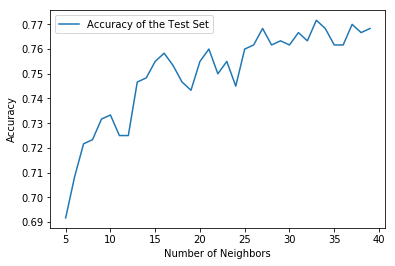

In [62]:
plt.plot(neighbors_settings, test_accuracy, label='Accuracy of the Test Set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

In [79]:
knn1 = KNeighborsClassifier(n_neighbors=5)

In [80]:
knn1.fit(train_new_df, train_labels.values.reshape(-1))

# train_new_df.shape

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [81]:
knn1_accuracy_train = knn1.score(train_new_df, train_labels.values.reshape(-1))
print("KNN Accuracy on train set:", knn_accuracy_train)

knn1_accuracy_test = knn1.score(test_new_data, test_labels.values.reshape(-1))
print("KNN Accuracy on test set:", knn1_accuracy_test)

KNN Accuracy on train set: 0.8265
KNN Accuracy on test set: 0.8833333333333333


3 . Random Forest Classifier

In [141]:
regr1 = RandomForestClassifier(n_estimators=100)
regr1.fit(train_new_df, train_labels.values.reshape(-1))
print("Train Accuracy for Random Forest",regr1.score(train_new_df, train_labels.values.reshape(-1)))
print("Test Accuracy for Random Forest",regr1.score(test_new_data, test_labels.values.reshape(-1)))

Train Accuracy for Random Forest 1.0
Test Accuracy for Random Forest 0.8883333333333333


4. Support Vector Machines 

In [92]:
from sklearn import svm
from sklearn.metricsR import accuracy_score

In [93]:
model = svm.SVC()

In [94]:
print ("Training model.")
#train model
model.fit(train_new_df, train_labels.values.reshape(-1))

Training model.


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [95]:
predicted_labels = model.predict(test_new_data)

In [96]:
print ("FINISHED classifying. accuracy score : ")
print (accuracy_score(test_labels.values.reshape(-1), predicted_labels))

FINISHED classifying. accuracy score : 
0.5016666666666667


In [97]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_labels.values.reshape(-1), predicted_labels) ) 

[[300   0]
 [299   1]]


In [98]:
from sklearn.metrics import classification_report

In [99]:
print(classification_report(test_labels,predicted_labels))

             precision    recall  f1-score   support

         -1       0.50      1.00      0.67       300
          1       1.00      0.00      0.01       300

avg / total       0.75      0.50      0.34       600



5 . Decision Tree using Gradient Boosting Classifier

In [105]:
from sklearn.ensemble import GradientBoostingClassifier #For Classification
from sklearn.ensemble import GradientBoostingRegressor #For Regression
clf1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=8)
clf1.fit(train_new_df, train_labels.values.reshape(-1))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1, loss='deviance', max_depth=8,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [140]:
train_accuracy_gradient=clf1.score(train_new_df, train_labels.values.reshape(-1))
print("train_Accuracy using Adaboost Classifier :",train_accuracy_gradient)

test_accuracy_gradient=clf1.score(test_new_data, test_labels.values.reshape(-1))
print("test_Accuracy using Adaboost Classifier :",test_accuracy_gradient)


train_Accuracy using Adaboost Classifier : 1.0
test_Accuracy using Adaboost Classifier : 0.86


6. Decision Tree using Adaboost Boosting Classifier

In [121]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier

In [122]:
dt = DecisionTreeClassifier() 

In [118]:
clf = AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=100, random_state=None)

In [119]:
clf.fit(train_new_df, train_labels.values.reshape(-1))

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=100, random_state=None)

In [139]:
train_accuracy_adaboost = clf.score(train_new_df, train_labels.values.reshape(-1)) 
print("Train Accuracy using Adaboost Classifier",train_accuracy_adaboost)

Train Accuracy using Adaboost Classifier 1.0


In [120]:
test_accuracy_adaboost = clf.score(test_new_data, test_labels.values.reshape(-1))
print("Test Accuracy using Adaboost Classifier",test_accuracy_adaboost)

test_Accuracy using Adaboost Classifier 0.9133333333333333
